In [8]:
import mne
import numpy as np
import os
import matplotlib.pyplot as plt
import glob
%matplotlib inline

In [13]:
#I need some file path for the header
header = glob.glob("/data/own_group8.vhdr")
#and the data
# retrieve the header file path automatically
# retrieve the data file path automatically

header = "/Users/elisius/Library/CloudStorage/OneDrive-AarhusUniversitet/4. Semester/EXAM_Neuro/Analysis/data/own_group8.vhdr"


In [14]:
raw = mne.io.read_raw_brainvision(header, eog = ("EOG1","EOG2"))

raw.load_data()

Extracting parameters from /Users/elisius/Library/CloudStorage/OneDrive-AarhusUniversitet/4. Semester/EXAM_Neuro/Analysis/data/own_group8.vhdr...
Setting channel info structure...
Reading 0 ... 652999  =      0.000 ...   652.999 secs...


<RawBrainVision | own_group8.eeg, 32 x 653000 (653.0 s), ~159.5 MB, data loaded>

In [15]:
montage = mne.channels.make_standard_montage('standard_1020') 
raw.set_montage(montage, verbose=False)


<RawBrainVision | own_group8.eeg, 32 x 653000 (653.0 s), ~159.5 MB, data loaded>

In [16]:
raw.set_eeg_reference('average', projection=False, verbose=False)

<RawBrainVision | own_group8.eeg, 32 x 653000 (653.0 s), ~159.5 MB, data loaded>

Using matplotlib as 2D backend.


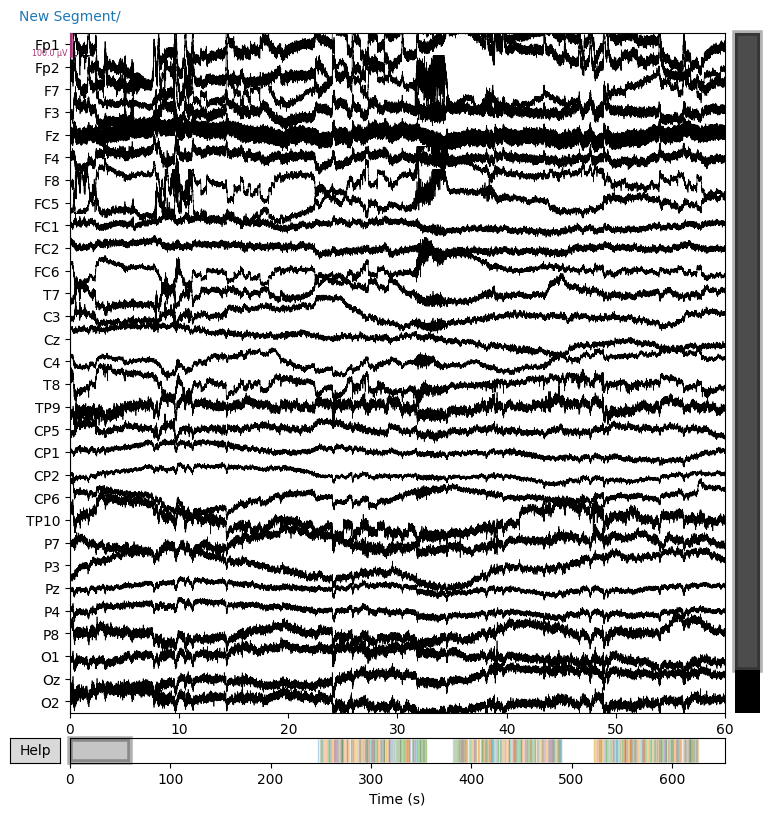

In [17]:
raw.plot(n_channels=30, duration=60, scalings= dict(eeg=50e-6));

Running Some ICA now to troubleshoot the signals


In [18]:
import sklearn

In [19]:
raw_fit = raw.copy().filter(1, None)

Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Filter length: 3301 samples (3.301 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    2.2s finished


In [20]:
ica = mne.preprocessing.ICA(n_components=0.95, random_state=7, max_iter=800)
ica.fit(raw_fit)

Fitting ICA to data using 30 channels (please be patient, this may take a while)
Selecting by explained variance: 15 components
Fitting ICA took 21.3s.


Method,fastica
Fit,39 iterations on raw data (653000 samples)
ICA components,15
Available PCA components,30
Channel types,eeg
ICA components marked for exclusion,—


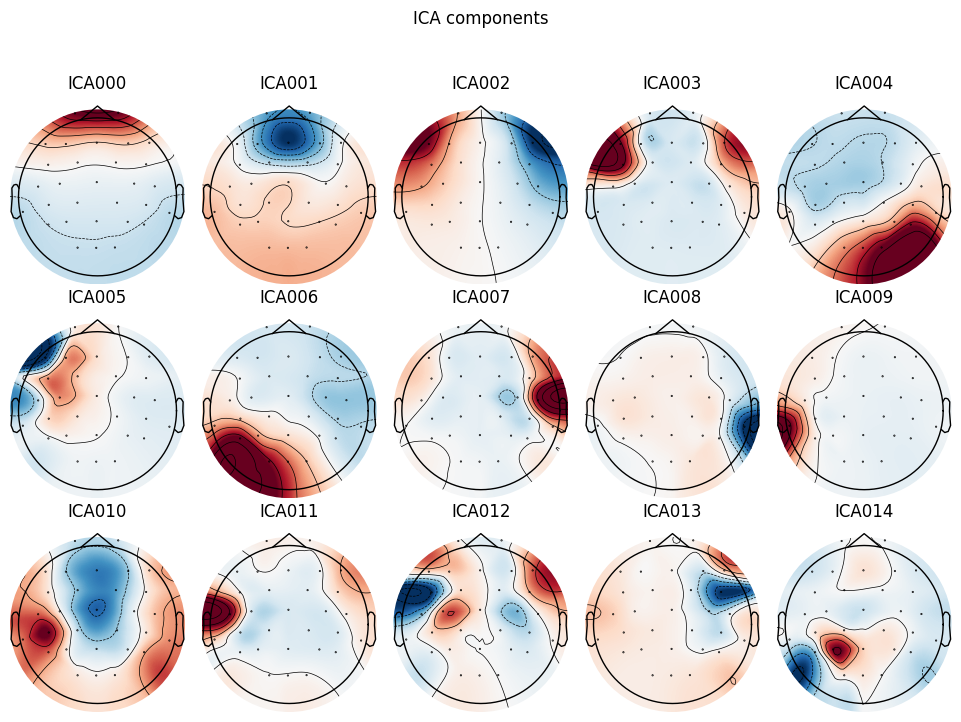

In [21]:
ica.plot_components();

Creating RawArray with float64 data, n_channels=17, n_times=653000
    Range : 0 ... 652999 =      0.000 ...   652.999 secs
Ready.


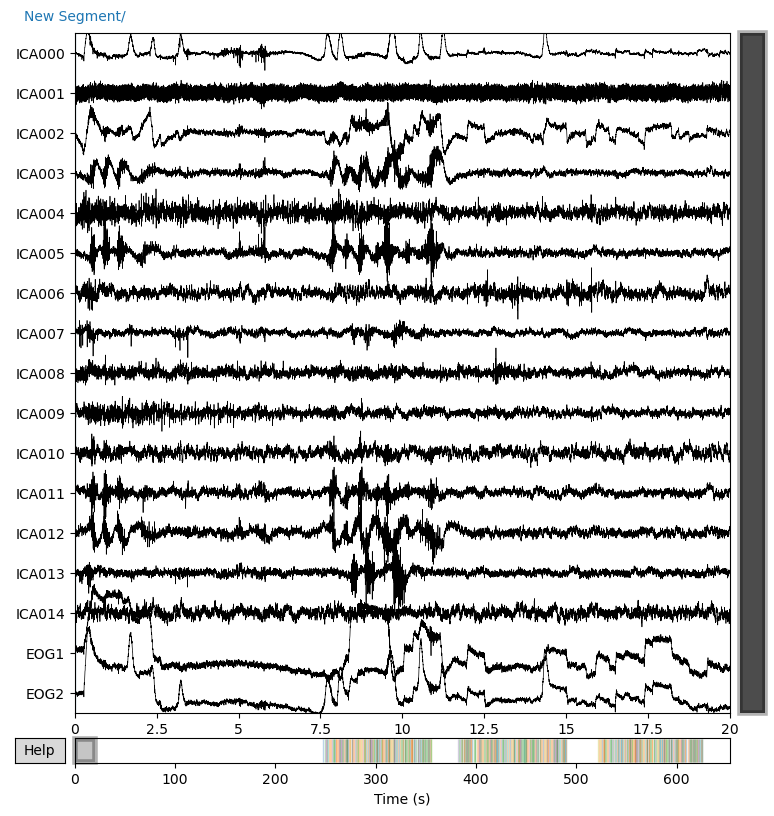

In [31]:
ica.plot_sources(raw_fit);

In [32]:
raw.filter(None, 40) # low pass filter

raw.filter(0.1, None) # high pass filter

Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 331 samples (0.331 sec)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.1 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.10
- Lower transition bandwidth: 0.10 Hz (-6 dB cutoff frequency: 0.05 Hz)
- Filter length: 33001 samples (33.001 sec)



[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    1.0s finished


<RawBrainVision | own_group8.eeg, 32 x 653000 (653.0 s), ~159.5 MB, data loaded>

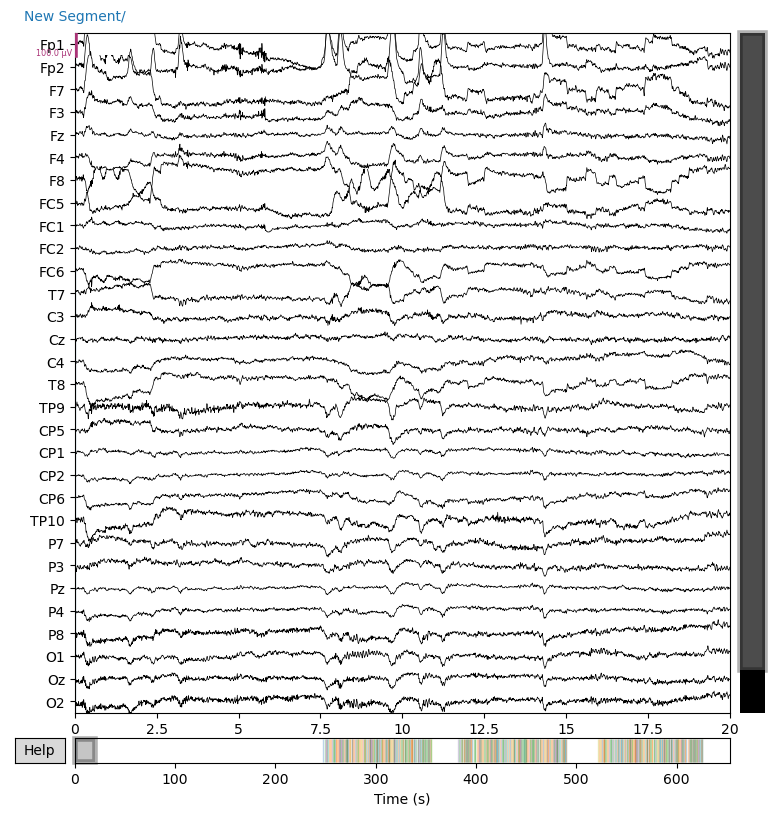

In [33]:
raw.plot(n_channels=30, duration=20, scalings= dict(eeg=50e-6));

Post-filtering -> Doing some eventing and epoching now to get into som plotting

In [23]:
events = mne.events_from_annotations(raw)[0] # extract events from annotations

# export events as csv
np.savetxt("events.csv", events, delimiter=",")

Used Annotations descriptions: ['New Segment/', 'Stimulus/S  1', 'Stimulus/S  2', 'Stimulus/S111', 'Stimulus/S112', 'Stimulus/S113', 'Stimulus/S114', 'Stimulus/S115', 'Stimulus/S121', 'Stimulus/S122', 'Stimulus/S123', 'Stimulus/S211', 'Stimulus/S212', 'Stimulus/S213', 'Stimulus/S214', 'Stimulus/S215', 'Stimulus/S221', 'Stimulus/S222', 'Stimulus/S223']


In [35]:

# event_id dict for our thatcher eeg experiment
event_id = {
    'Changed/Familliar/0' : 221,
    'Changed/Familliar/90' : 222,
    'Changed/Familliar/180' : 223,
    'Changed/Unfamilliar/0' : 211,
    'Changed/Unfamilliar/90' : 212,
    'Changed/Unfamilliar/180' : 213,
    'Unchanged/Familliar/0' : 121,
    'Unchanged/Familliar/90' : 122,
    'Unchanged/Familliar/180' : 123,
    'Unchanged/Unfamilliar/0' : 111,
    'Unchanged/Unfamilliar/90' : 112,
    'Unchanged/Unfamilliar/180' : 113,
    'Response_Changed' : 1,
    'Response_Unchanged' : 2,

}

/tmp/ipykernel_1880/1053149796.py:1: RuntimeWarning: event 114 missing from event_id will be ignored
  mne.viz.plot_events(events=events, first_samp = raw.first_samp, event_id = event_id);
/tmp/ipykernel_1880/1053149796.py:1: RuntimeWarning: event 115 missing from event_id will be ignored
  mne.viz.plot_events(events=events, first_samp = raw.first_samp, event_id = event_id);
/tmp/ipykernel_1880/1053149796.py:1: RuntimeWarning: event 214 missing from event_id will be ignored
  mne.viz.plot_events(events=events, first_samp = raw.first_samp, event_id = event_id);
/tmp/ipykernel_1880/1053149796.py:1: RuntimeWarning: event 215 missing from event_id will be ignored
  mne.viz.plot_events(events=events, first_samp = raw.first_samp, event_id = event_id);
/tmp/ipykernel_1880/1053149796.py:1: RuntimeWarning: event 99999 missing from event_id will be ignored
  mne.viz.plot_events(events=events, first_samp = raw.first_samp, event_id = event_id);
/tmp/ipykernel_1880/1053149796.py:1: RuntimeWarning: 

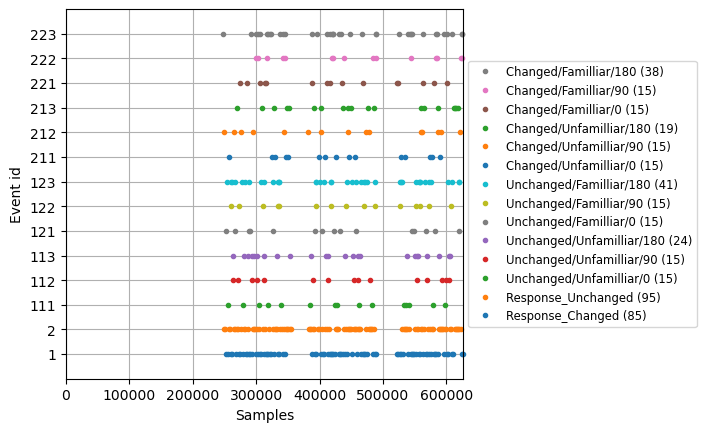

In [36]:
mne.viz.plot_events(events=events, first_samp = raw.first_samp, event_id = event_id);

In [37]:
tmin, tmax = -0.1, 0.7
reject = {'eeg': 150e-6}

In [38]:
epochs = mne.Epochs(raw, events=events, event_id=event_id, tmin=tmin, tmax=tmax, reject=reject, preload = True)



Not setting metadata
422 matching events found
Setting baseline interval to [-0.1, 0.0] sec
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 422 events and 801 original time points ...
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp1']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp2']
    Rejecting  epoch based on EEG : ['Fp1', 'Fp2']
    Rejecting  epoch based on EEG : ['Fp2']

In [39]:
epochs.resample(250, npad='auto')

Number of events,401
Events,Changed/Familliar/0: 15Changed/Familliar/180: 37Changed/Familliar/90: 15Changed/Unfamilliar/0: 15Changed/Unfamilliar/180: 19Changed/Unfamilliar/90: 15Response_Changed: 74Response_Unchanged: 88Unchanged/Familliar/0: 15Unchanged/Familliar/180: 39Unchanged/Familliar/90: 15Unchanged/Unfamilliar/0: 15Unchanged/Unfamilliar/180: 24Unchanged/Unfamilliar/90: 15
Time range,-0.100 – 0.696 sec
Baseline,-0.100 – 0.000 sec


In [46]:
# NOT evoked variabled 
all_changed = epochs['Changed']
all_unchanged = epochs['Unchanged']

# Evoked variables
## Changed vs unchaged
all_changed_evoked = epochs['Changed'].average()
all_unchanged_evoked = epochs['Unchanged'].average()

## creating for changed vs unchanged for each rotation
changed_0 = epochs['Changed/0'].average()
changed_90 = epochs['Changed/90']
changed_180 = epochs['Changed/180']

unchanged_0 = epochs['Changed/0']
unchanged_90 = epochs['Changed/90']
unchanged_180 = epochs['Changed/180']


Trying to create some plots of all epochs for Oz, O1, O2 to check the data, we can do some ICA after if we want to

Not setting metadata
116 matching events found
No baseline correction applied
0 projection items activated


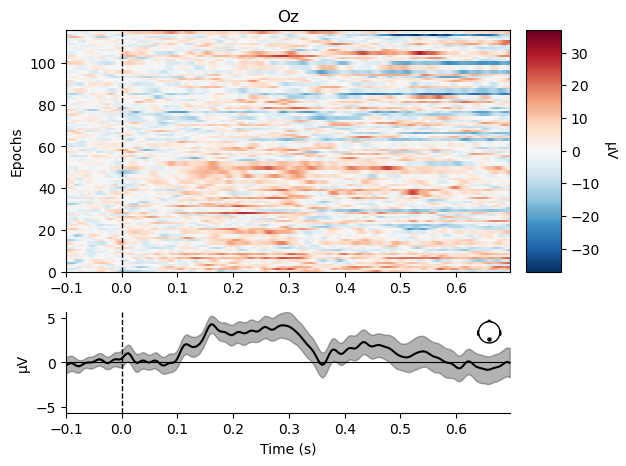

Not setting metadata
123 matching events found
No baseline correction applied
0 projection items activated


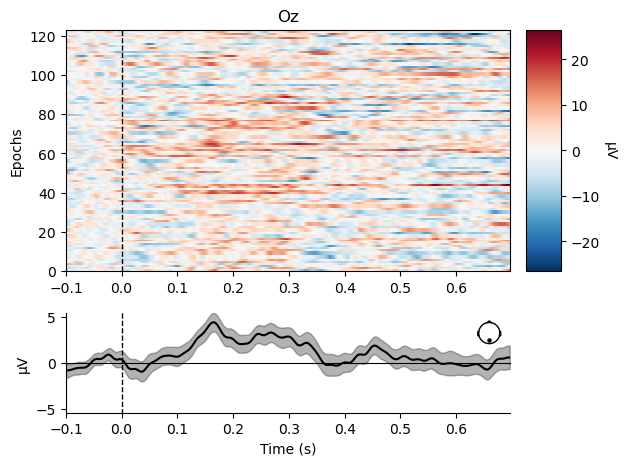

In [42]:
all_changed.plot_image(picks=('Oz'));
all_unchanged.plot_image(picks=('Oz'));

In [48]:
mne.viz.plot_compare_evokeds(dict(changed=all_changed_evoked, unchanged=all_unchanged_evoked),
                             linestyles=dict(0 ='solid', 0='dashed'),
                             legend='upper left', show_sensors='upper right')



SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (2105105940.py, line 2)

In [49]:
mne.viz.plot_compare_evokeds(colors=dict(aud=0, vis=1),
                             linestyles=dict(left='solid', right='dashed'),
                             time_unit='ms')


TypeError: plot_compare_evokeds() missing 1 required positional argument: 'evokeds'